# Regression Model

Bu projenin amacı turbo fan motorlarının kalan ömrünü hesaplamak. Bir önceki python dosyasında sınıflandırma (classification) görevini yaptık ve modelin doğruluğu oldukça iyiydi. Bu kısımda ise bunu bir regresyon problemi olarak ele alacağız. Amacımız ise herhangi bir EDA ve hiper parametre ayarı yapmadan Makine öğrenmesini eğitmek ve RUL (Faydalı Kalan Ömür) tahmin etmek olacak.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
df = pd.read_csv('RUL_Train_001.txt')

In [5]:
df

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [6]:
df[df['RUL']==0] # Kaç tane motorun başarısız çalıştığını verir.

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL
191,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,21.61,...,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,0
478,287,-0.0005,0.0006,100.0,518.67,643.85,1608.50,1430.84,14.62,21.61,...,2388.21,8175.57,8.5365,0.03,398,2388,100.0,38.43,23.0848,0
657,179,0.0012,0.0000,100.0,518.67,643.51,1604.80,1428.23,14.62,21.61,...,2388.20,8255.34,8.5056,0.03,398,2388,100.0,38.40,22.9562,0
846,189,-0.0024,-0.0002,100.0,518.67,644.53,1612.11,1432.55,14.62,21.61,...,2388.16,8259.42,8.5246,0.03,398,2388,100.0,38.44,23.1006,0
1115,269,0.0022,0.0003,100.0,518.67,643.46,1597.28,1430.74,14.62,21.61,...,2388.16,8212.75,8.5209,0.03,397,2388,100.0,38.45,23.0296,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19887,336,-0.0031,-0.0005,100.0,518.67,643.74,1599.20,1432.12,14.62,21.61,...,2388.24,8144.03,8.5022,0.03,397,2388,100.0,38.36,23.0258,0
20089,202,0.0014,0.0001,100.0,518.67,643.79,1610.66,1427.41,14.62,21.61,...,2388.15,8263.63,8.5277,0.03,397,2388,100.0,38.29,23.1184,0
20245,156,0.0077,-0.0003,100.0,518.67,643.02,1603.77,1432.16,14.62,21.61,...,2388.26,8122.22,8.5308,0.03,396,2388,100.0,38.33,23.1137,0
20430,185,-0.0019,-0.0004,100.0,518.67,643.93,1598.42,1421.56,14.62,21.61,...,2388.24,8127.53,8.5425,0.03,397,2388,100.0,38.49,23.1931,0


# Train Test Split

In [11]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)


In [12]:
# Keyfi parametreleri Başlatma
regressor = RandomForestRegressor()

# Modeli Eğitme
regressor.fit(X_train, y_train)

RandomForestRegressor()

# Training Plot

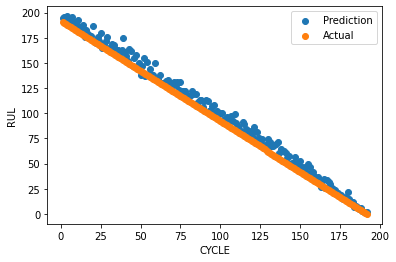

RMSE on Train set:  12.139782039549367


In [15]:
# Trainlenmiş modeli kullanarak nasıl trainlendiğini kontrol edeceğim.
y_pred = regressor.predict(X_train)

# Trainlenmiş datayı plot ile çizdirdim.
plt.scatter(X_train['Cycle'][0:192], y_pred[0:192])
plt.scatter(X_train['Cycle'][0:192], np.array(y_train)[0:192])
plt.ylabel('RUL')
plt.xlabel('CYCLE')
plt.legend(['Prediction', 'Actual'], loc = 'upper right')
plt.show()

print('RMSE on Train set: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
# metrics.mean_squared_error Öklid mesafesini kullanarak tahminlerin ölçülen gerçek değerlerden ne kadar uzak olduğunu gösteriyor.

# Test Plot

RMSE on Test set: 49.286258649738045


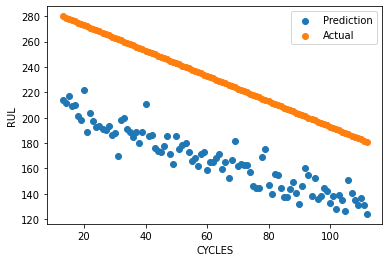

In [16]:
# Trainlenmiş datayı kullanarak Test datayı kontrol etme
y_pred = regressor.predict(X_test)

print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# test datayı çizdirme
plt.scatter(X_test['Cycle'][100:200], y_pred[100:200])
plt.scatter(X_test['Cycle'][100:200], np.array(y_test)[100:200])
plt.legend(['Prediction', 'Actual'], loc = 'upper right')
plt.ylabel('RUL')
plt.xlabel('CYCLES')
plt.show()